In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score,recall_score
import pandas as pd
from modelo import load,evaluate,Model,ORGAOS

In [2]:
folder = 'ARRAY_FORMAT'
data_files = [os.path.join(folder,name) for name in os.listdir(folder)]
len(data_files)

1588

In [6]:
model = Model('MODEL')
precision = {org:[] for org in ORGAOS}
recall = {org:[] for org in ORGAOS}
for i,file in enumerate(data_files):
    img,struc = load(file)
    prediction = model.predict(img)
    res = evaluate(struc,prediction)
    for org in ORGAOS:
        precision[org].append(res[org][0])
        recall[org].append(res[org][1])
    print('Files:',i,end = '\r')

m_precision = {org:np.array(precision[org]).mean() for org in ORGAOS}
m_recall = {org:np.array(recall[org]).mean() for org in ORGAOS}

In [7]:
table = pd.DataFrame({'Precision':m_precision.values(),'Recall':m_recall.values()},index = ORGAOS)
table

,Precision,Recall
artery,0.302865,0.084816
liver,0.456179,0.235638
stomach,0.165460,0.303250
vein,0.234572,0.306315


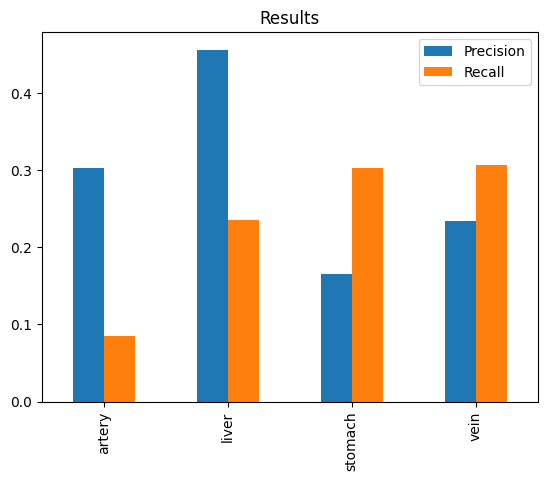

In [8]:
table.plot(kind = 'bar',title = 'Results')
plt.show()